In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

In [13]:
df = pd.read_csv('mobile_prices_2023.csv')
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [15]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [16]:
df.shape

(1836, 11)

In [17]:
categorical_data = df.select_dtypes(include=['object','category'])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0],inplace=True)
df.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [18]:
df['Price in INR'] = df['Price in INR'].str.replace(',','')
df['Price in INR'] = df['Price in INR'].str.replace('₹','')
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',','')
df['Price in INR'] = pd.to_numeric(df['Price in INR'])
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   int64  
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1836 non-null   object 
 5   Back/Rare Camera   1836 non-null   object 
 6   Front Camera       1836 non-null   object 
 7   Battery            1836 non-null   object 
 8   Processor          1836 non-null   object 
 9   Price in INR       1836 non-null   int64  
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 157.9+ KB


In [19]:
encoder = LabelEncoder()
category = df.select_dtypes(include=['object','category'])
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,746,4.2,33561,16,14,171,26,78,187,5649,0
1,789,4.2,77128,25,20,118,32,78,173,11999,0
2,748,4.3,15175,25,20,172,26,78,106,6999,0
3,750,4.2,22621,25,20,137,26,78,193,7749,0
4,747,4.3,15175,25,20,172,26,78,106,6999,0


In [20]:
X = df.drop(['Price in INR'],axis = 1)
Y = df['Price in INR']

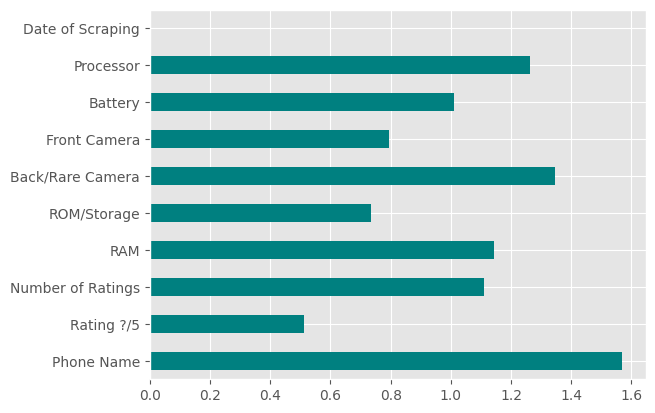

In [21]:
from sklearn.feature_selection import mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(X,Y)
feature_impor = pd.Series(importance,X.columns[0:len(X.columns)])
feature_impor.plot(kind = 'barh', color = 'teal')
plt.show()